In [108]:
import pandas as pd
import numpy as np

In [109]:
df=pd.read_csv("C:\\Users\\jojic\\OneDrive\\Desktop\\mljourney\\exam\\placement-casestudy\\placement.csv.xls")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cgpa                  1000 non-null   float64
 1   placement_exam_marks  1000 non-null   float64
 2   placed                1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


In [110]:
df.isnull().sum()

cgpa                    0
placement_exam_marks    0
placed                  0
dtype: int64

In [111]:
df[df.duplicated()].shape

(19, 3)

In [112]:
df.columns

Index(['cgpa', 'placement_exam_marks', 'placed'], dtype='object')

In [113]:
df.drop_duplicates(inplace=True)

In [114]:
df[df.duplicated()].shape 

(0, 3)

In [115]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [116]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train

,cgpa,placement_exam_marks
992,6.26,12.0
629,8.15,11.0
946,7.95,12.0
33,6.23,27.0
31,7.66,44.0
...,...,...
106,6.59,22.0
270,6.80,16.0
874,6.60,24.0
435,7.45,37.0


In [117]:
from sklearn.preprocessing import MinMaxScaler 
scaler=MinMaxScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)
x_train 

array([[0.32387707, 0.12      ],
       [0.77068558, 0.11      ],
       [0.72340426, 0.12      ],
       ...,
       [0.40425532, 0.24      ],
       [0.60520095, 0.37      ],
       [0.24349882, 0.22      ]], shape=(784, 2))

In [118]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train) 

,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",3
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Refer to the example entitled:ref:`sphx_glr_auto_examples_neighbors_plot_classification.py`showing the impact of the `weights` parameter on the decisionboundary.",'uniform'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"p p: float, default=2Power parameter for the Minkowski metric. When p = 1, this is equivalentto using manhattan_distance (l1), and euclidean_distance (l2) for p = 2.For arbitrary p, minkowski_distance (l_p) is used. This parameter is expectedto be positive.",2
,"metric metric: str or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.",'minkowski'
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.Doesn't affect :meth:`fit` method.",None


In [119]:
y_pred=knn.predict(x_test)

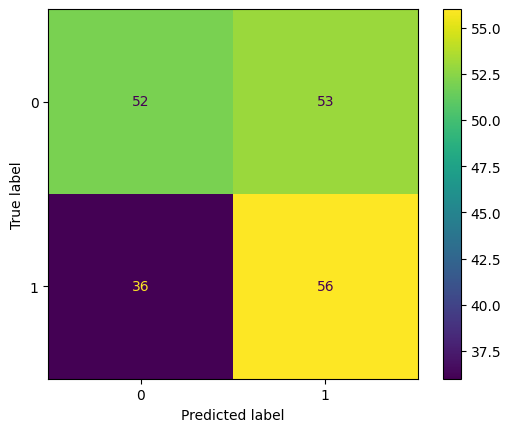

In [120]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [121]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
print("accuracy_score:",accuracy_score(y_test,y_pred)*100)
print("precision_score:",precision_score(y_test,y_pred)*100)
print("recall_score:",recall_score(y_test,y_pred)*100)
print("f1_score:",f1_score(y_test,y_pred)*100) 

accuracy_score: 54.82233502538071
precision_score: 51.37614678899083
recall_score: 60.86956521739131
f1_score: 55.72139303482587


In [122]:
from sklearn.naive_bayes import GaussianNB
gb=GaussianNB()
gb.fit(x_train,y_train)

,"priors priors: array-like of shape (n_classes,), default=NonePrior probabilities of the classes. If specified, the priors are notadjusted according to the data.",None
,"var_smoothing var_smoothing: float, default=1e-9Portion of the largest variance of all features that is added tovariances for calculation stability... versionadded:: 0.20",1e-09


In [123]:
y_pred=gb.predict(x_test)

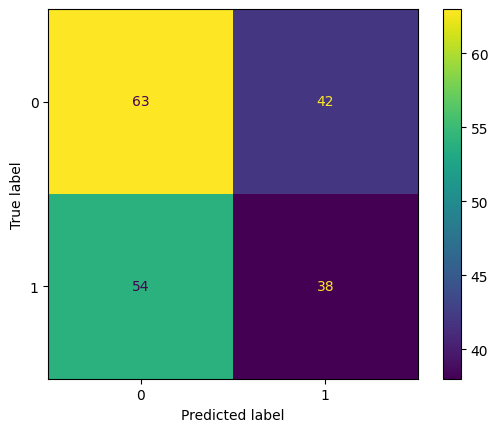

In [124]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [125]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
print("accuracy_score:",accuracy_score(y_test,y_pred)*100)
print("precision_score:",precision_score(y_test,y_pred)*100)
print("recall_score:",recall_score(y_test,y_pred)*100)
print("f1_score:",f1_score(y_test,y_pred)*100) 

accuracy_score: 51.26903553299492
precision_score: 47.5
recall_score: 41.30434782608695
f1_score: 44.18604651162791
